In [45]:
# imports
import numpy as np
import os
import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from utils.dataset import SeparationDataset
from utils.transforms import STFT, ISTFT
from torch.autograd import Variable

In [2]:
# init dataset
HOME = os.path.expanduser("~")
TEST = os.path.join(HOME, "storage", "separation", "pt_test")
TRAIN = os.path.join(HOME, "storage", "separation", "pt_train")
train_ds = SeparationDataset(TRAIN)
test_ds = SeparationDataset(TEST)
print(f"Training set contains {len(train_ds)} samples.")
print(f"Testing set contains {len(test_ds)} samples.")

Training set contains 100 samples.
Testing set contains 50 samples.


Text(0, 0.5, 'Vocals')

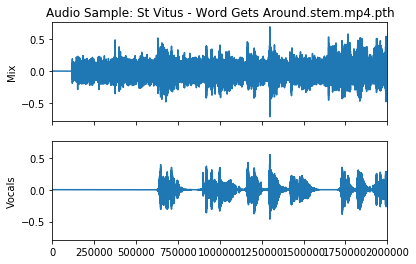

In [3]:
# sample viewer
nsamples = int(2e6)
idx = 1
sample = train_ds[idx]
x = sample["mix"]
y = sample["vocals"]

f, subplot = plt.subplots(2, sharex=True, sharey=True)

subplot[0].set_title("Audio Sample: {}".format(train_ds.filenames[idx]))
subplot[0].set_xlim(0, nsamples)
subplot[0].plot(range(nsamples), np.transpose(x.numpy()[:, 0:nsamples, 0]))
subplot[0].set_ylabel("Mix")
subplot[1].plot(range(nsamples), np.transpose(y.numpy()[:, 0:nsamples, 0]))
subplot[1].set_ylabel("Vocals")


In [46]:
# testing stft
stft = STFT()
istft = ISTFT()

# grab a random sample 
sample = train_ds[0]

print(f"{sample['mix'].shape}")

torch.Size([1, 8624128, 2])


In [53]:
# grab a random sample 
sample = train_ds[2]['mix']

nsamples = 10000

thing = sample[:, 0:nsamples, 0]



In [62]:
magnitude, phase, ac = stft.forward(Variable(thing));
print(f"{magnitude.shape}, {phase.shape}, {ac.shape}")

torch.Size([1, 1, 512, 18]), torch.Size([1, 1, 512, 18]), torch.Size([1, 1, 18])


tensor([[[ 0.1289,  0.0083, -0.2330,  0.1833,  0.0323, -0.1817,  0.0584,
           0.1465, -0.1655, -0.0512,  0.1994, -0.0727, -0.1832,  0.1576,
          -0.0117, -0.1443,  0.0609,  0.1236]]], grad_fn=<SelectBackward>)


In [64]:
reconstruction = istft.forward(magnitude, phase, ac)
print(f"{reconstruction.shape}")



torch.Size([1, 9728])


ValueError: x and y must have same first dimension, but have shapes (512,) and (1, 10000)

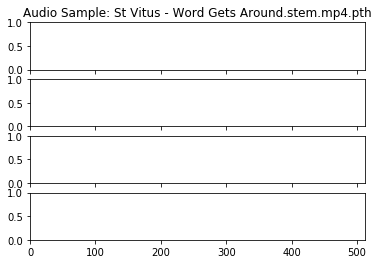

In [66]:


f, subplot = plt.subplots(4, sharex=True)

nsamples = 512

subplot[0].set_title("Audio Sample: {}".format(train_ds.filenames[idx]))
subplot[0].set_xlim(0, nsamples)
subplot[0].plot(range(nsamples), thing.numpy()[0:nsamples])
subplot[0].set_ylabel("Mix")
subplot[1].plot(range(nsamples), magnitude.detach().numpy()[0,:,:,0])
subplot[1].set_ylabel("STFT Mix (Magnitude)")
subplot[2].plot(range(nsamples), np.transpose(phase.detach().numpy()[0,:,:,0]))
subplot[2].set_ylabel("STFT Mix (Phase)")
subplot[3].plot(range(nsamples), torch.t(reconstruction).numpy()[0:nsamples])
subplot[3].set_ylabel("Reconstructed Mix (Phase)")



In [ ]:
# configuration

dtype = torch.float

device = torch.device("cpu") # Uncomment this to run on CPU
# device = torch.device("cuda:0") # Uncomment this to run on GPU




# XXX can probably pass num_workers=4
# we also need to use a batch size of 1 since we have a dimension mismatch 
# (i.e. there's a different amount of samples depending on the song)
# TODO we should look into transformations
dataloader = DataLoader(train_ds, batch_size=1, shuffle=True)
testloader = DataLoader(test_ds, batch_size=1, shuffle=True)

In [ ]:
# hyperparams




In [5]:
# main training loop
for i, sample in enumerate(dataloader):
    # do something here. For now we'll just print the sample
    print(i, sample['mix'].size(), sample['vocals'].size())

0 torch.Size([1, 1, 11353088, 2]) torch.Size([1, 1, 11353088, 2])
1 torch.Size([1, 1, 1523712, 2]) torch.Size([1, 1, 1523712, 2])
2 torch.Size([1, 1, 11659264, 2]) torch.Size([1, 1, 11659264, 2])
3 torch.Size([1, 1, 9014272, 2]) torch.Size([1, 1, 9014272, 2])
4 torch.Size([1, 1, 8011776, 2]) torch.Size([1, 1, 8011776, 2])
5 torch.Size([1, 1, 9739264, 2]) torch.Size([1, 1, 9739264, 2])
6 torch.Size([1, 1, 10175488, 2]) torch.Size([1, 1, 10175488, 2])
7 torch.Size([1, 1, 8914944, 2]) torch.Size([1, 1, 8914944, 2])
8 torch.Size([1, 1, 761856, 2]) torch.Size([1, 1, 761856, 2])
9 torch.Size([1, 1, 10935296, 2]) torch.Size([1, 1, 10935296, 2])
10 torch.Size([1, 1, 10536960, 2]) torch.Size([1, 1, 10536960, 2])
11 torch.Size([1, 1, 10438656, 2]) torch.Size([1, 1, 10438656, 2])
12 torch.Size([1, 1, 10222592, 2]) torch.Size([1, 1, 10222592, 2])
13 torch.Size([1, 1, 13972480, 2]) torch.Size([1, 1, 13972480, 2])
14 torch.Size([1, 1, 9300992, 2]) torch.Size([1, 1, 9300992, 2])
15 torch.Size([1, 1, 